In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

def csv_to_dataframe(file_path):

    df = pd.read_csv(file_path)
    return df

def sort_dataframe_by_column(df, column_name, ascending=True):

    sorted_df = df.sort_values(by=column_name, ascending=ascending)
    return sorted_df

In [12]:
data_opaque = csv_to_dataframe("data/6-3cm_opaque.csv")
data_partial = csv_to_dataframe("data/30-3cm.csv")
data_opaque = sort_dataframe_by_column(data_opaque, "resgister")



In [ ]:
data_registerZero = data_opaque[data_opaque["resgister"] == 0]
averages_close = data_registerZero.groupby("trialNum")["reading (mm)"].median()
averages_partial = data_partial.groupby("trialNum")["reading (mm)"].mean()
print(averages_partial)
print(averages)

trialNum
1     295.74
2     288.31
3     276.45
4     268.93
5     257.65
6     250.16
7     240.61
8     232.07
9     223.21
10    218.51
11    204.36
12    185.98
13    183.47
14    170.59
15    159.68
16    157.20
Name: reading (mm), dtype: float64
trialNum
1     54.0
2     51.0
3     48.0
4     45.0
5     40.0
6    103.0
7    192.0
Name: reading (mm), dtype: float64


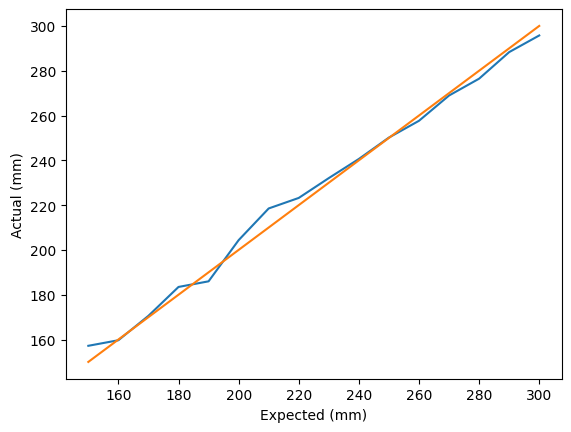

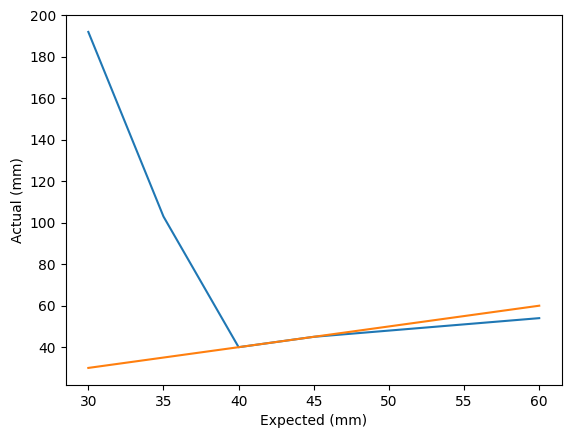

In [21]:
expected = [300, 290, 280, 270, 260, 250, 240, 230, 220, 210, 200, 190, 180, 170, 160, 150]
expected_close = [60, 55, 50, 45, 40, 35, 30]
plt.figure()
plt.plot(expected, averages_partial)
plt.plot(expected, expected)
plt.xlabel("Expected (mm)")
plt.ylabel("Actual (mm)")

plt.figure()
plt.plot(expected_close, averages_close)
plt.plot(expected_close, expected_close)
plt.xlabel("Expected (mm)")
plt.ylabel("Actual (mm)")


plt.show()

# 30-27 CM with 2mm Increments
### Notes
- This is for a matte opaque object (Hard Cover Book). Not transparent to 60Ghz em wave
- I think there is something weird with my python script or code that I pushed to the teensy that causes a timing mismatch, could also be a bug in sparkfuns library. Regardless I think sometimes the sensor withholds readings from being sent over serial, so I get mismatches between actualy readings and I what I think should be expected. I think it also does some calibration on start, so for these trials I powered off and the powered on the teensy before each measurement. This fixes both things, and potentially is closer to its actual use where it powers on to take a couple measurements quickly and then goes back to sleep. 

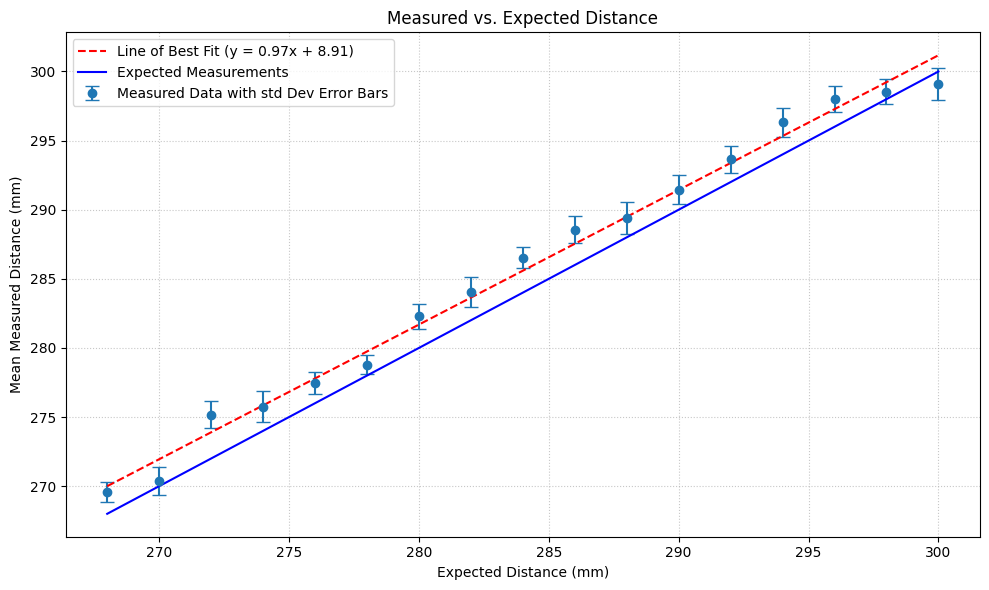

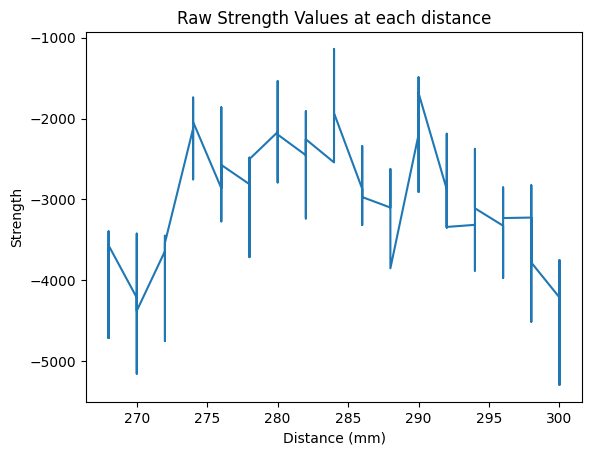

In [47]:

# Data
def plot_with_error(df):
    df = df[df["resgister"] == 0]
    average_distances = df.groupby("trialNum")["reading"].mean()
    average_strengths = df.groupby("trialNum")["strength"].mean()
    expected = df.groupby("trialNum")["expected"].mean()

    # Error/mean:
    df_summary = df.groupby("expected")['reading'].agg(['mean', 'std']).reset_index()
    df_summary['std'] = df_summary['std'].fillna(0)

    slope, intercept, r_value, p_value, std_err = linregress(
        df_summary['expected'],
        df_summary['mean']
    )

    regression_line = slope * df_summary['expected'] + intercept
    plt.figure(figsize=(10, 6))
    plt.errorbar(
        df_summary['expected'],
        df_summary['mean'],
        df_summary['std'],
        fmt="o",
        capsize=5,
        label='Measured Data with std Dev Error Bars'
    )
    plt.plot(
        df_summary['expected'],
        regression_line,
        color='red',
        linestyle='--',
        label=f'Line of Best Fit (y = {slope:.2f}x + {intercept:.2f})'
    )
    plt.plot(
        df_summary['expected'],
        df_summary['expected'],
        color='blue',
        label="Expected Measurements"
    )
    plt.title('Measured vs. Expected Distance')
    plt.xlabel('Expected Distance (mm)')
    plt.ylabel('Mean Measured Distance (mm)')
    plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
    plt.legend()
    plt.tight_layout() 
    plt.show()
df = csv_to_dataframe("data/30-28cm_2mm_increment.csv")
plot_with_error(df)

plt.figure()
plt.plot(df["expected"], df["strength"])
plt.xlabel("Distance (mm)")
plt.ylabel("Strength")
plt.title("Raw Strength Values at each distance")
plt.show()

# 30-3cm with 10mm Increments
### Notes
- Looking to have on the order of a 2mm offset here, we'll keeping on taking 50 datapoints for each distance and then averaging. Same thing with booting on and off the teensy. 
- Still a matte, opaque object (hardcover book)

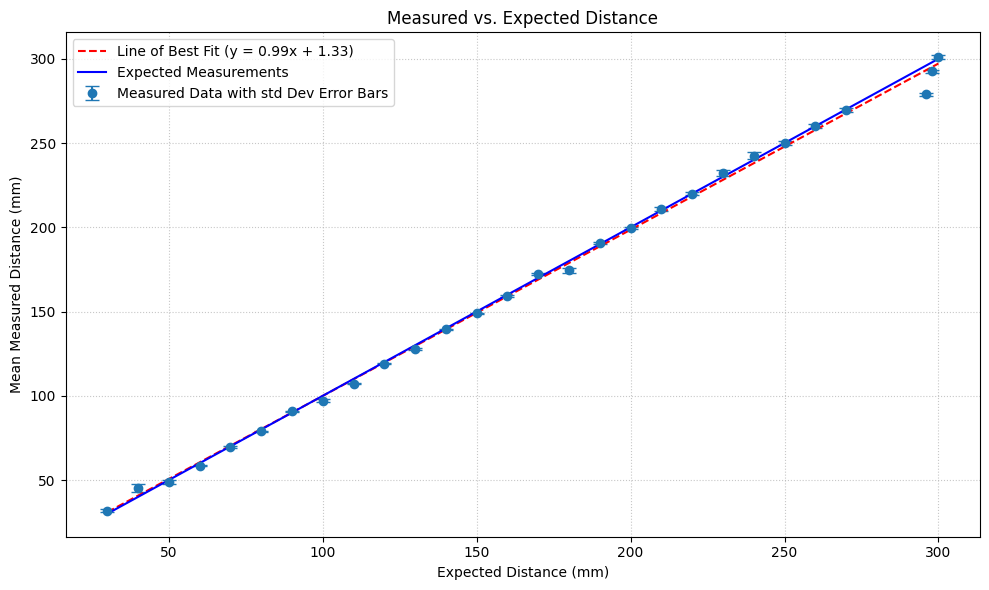

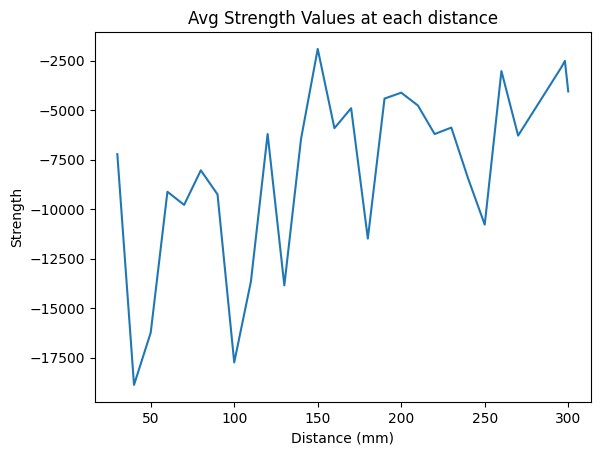

In [51]:
# Get data: 
df = csv_to_dataframe("data/30-3cm_10mm_increment.csv")
plot_with_error(df)

strengths_avg = df.groupby("trialNum")["strength"].mean()
expected = df.groupby("trialNum")["expected"].mean()

plt.figure()
plt.plot(expected, strengths_avg)
plt.xlabel("Distance (mm)")
plt.ylabel("Strength")
plt.title("Avg Strength Values at each distance")
plt.show()

